## **Conjunto de dados Economicos do Brasil**

Nesse projeto iremos analisar dados da renda per capita dos estados da união. 

Link oficial dos dados:  http://www.atlasbrasil.org.br/


In [ ]:
# Importando bibliotecas
# (importing libraries)

# bibliotecas para modelagem e matrizes
# (libraries for modeling and matrices)
import numpy as np
import pandas as pd

# bibliotecas para análises gráficas
# (libraries for graphical analysis)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [ ]:
# Lendo a base de
# (reading the data)
base_dados = pd.read_excel('Dados_Pib.xlsx')

# Imprimindo os primeiros registros 
# (firts records)
base_dados.head()

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25


In [ ]:
# Verificando informações sobre a base de dados
# (check information)
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Territorialidades  112 non-null    object 
 1   Ano                112 non-null    int64  
 2   PIB per capita     112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


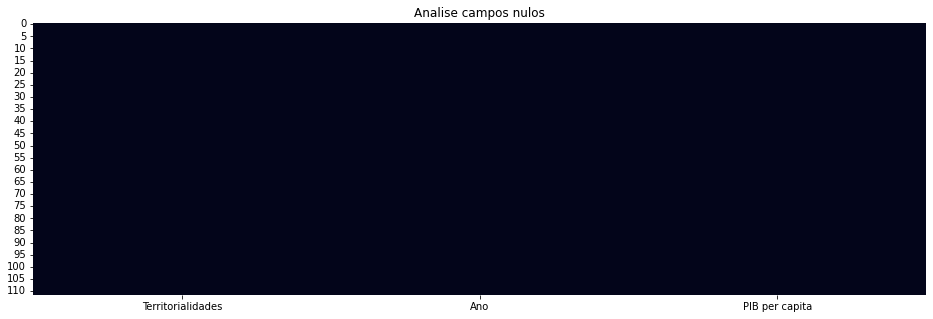

In [ ]:
# Visualizando os campos nulos no gráfico
# OBS: No gráfico abaixo podemos ver que existem campos nulos  
# na coluna 'Year' e 'Genre'
# (Visualizing the null fields in the chart
# OBS: In the chart below we can see that there are null fields
# in the 'Year' and 'Genre' column)


nulo = base_dados.isnull()

plt.figure(figsize=(16, 5))
plt.title('Analise campos nulos')
sns.heatmap(nulo, cbar=False);

In [ ]:
# Descrição base de dados 
# Description database

base_dados.describe()

,Ano,PIB per capita
count,112.000000,112.000000
mean,2014.500000,18.367411
std,1.123059,9.481273
min,2013.000000,8.140000
25%,2013.750000,11.647500
50%,2014.500000,14.850000
75%,2015.250000,23.727500
max,2016.000000,54.480000


In [ ]:
# Usando o groupby para agrupar os territorialidades e anos. 
# (Using groupby to group the territorialities and years.)

base_dados.groupby(by=['Territorialidades', 'Ano']).mean()

PIB per capita
Territorialidades Ano                 
Acre              2013           12.37
                  2014           13.41
                  2015           12.24
                  2016           11.18
Alagoas           2013            9.45
...                                ...
São Paulo         2016           30.24
Tocantins         2013           13.47
                  2014           13.77
                  2015           13.79
                  2016           13.68

[112 rows x 1 columns]

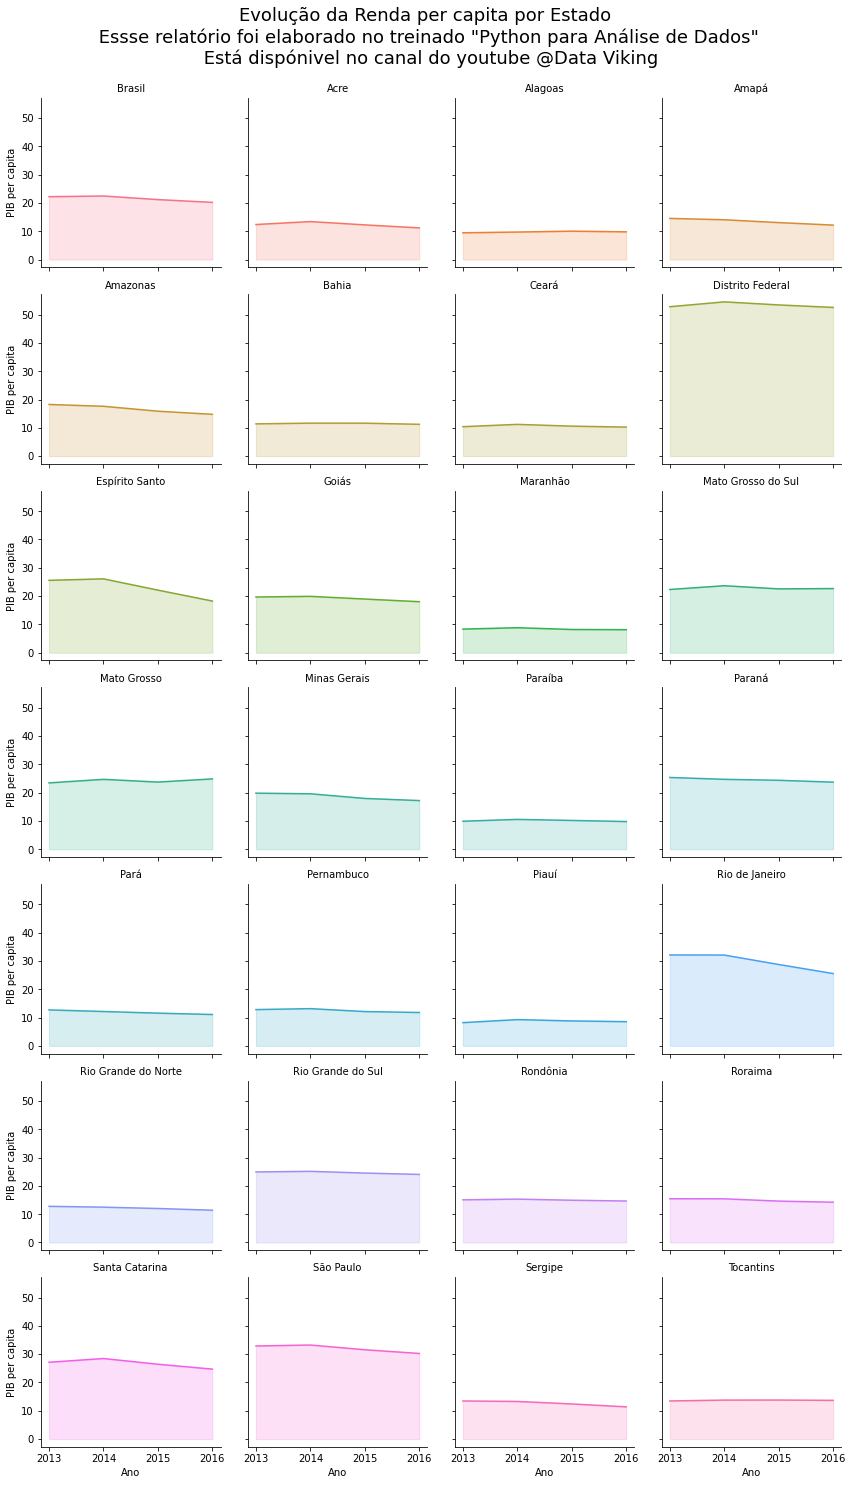

In [ ]:
# Sistema de Grids
# (Grid System)

# Cor de fundos 
# (background color)
cor_fundos = '#f5f5f5'

# criando o sistema de grids 
# (created the grid system)
grid_graficos = sns.FacetGrid(base_dados, col='Territorialidades', hue='Territorialidades', col_wrap=4);

# Adiciona um grafico de linhas em cada local disponivel
# (Add a line graph at each available location)
grid_graficos = grid_graficos.map(plt.plot, 'Ano', 'PIB per capita')

# Adicionando uma sombra + o ajuste do titulo
# (Adding a Shadow + Adjusting the Title)
grid_graficos = grid_graficos.map(plt.fill_between, 'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} Territorialidades')

# Tirando o nome Territorialidades (filtrando o titulo)
# (# Removing the name Territorialities (filtering the title))
grid_graficos = grid_graficos.set_titles('{col_name}')

# Adicionando um subtitulo 
# (Adding a subtitle)
grid_graficos = grid_graficos.fig.suptitle(
    'Evolução da Renda per capita por Estado \n Essse relatório foi elaborado '
    'no treinado "Python para Análise de Dados" \n Está dispónivel no canal '
    'do youtube @Data Viking',
    fontsize=18
)

# Ajustando
# (tuning)
plt.subplots_adjust( top=0.92 )